<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week3-visualization/Week3_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/dmnarula/football-ds-learning/refs/heads/main/week3-visualization/data/pl_data_gw14_25_26_full.csv"
df = pd.read_csv(url)

df.head()

,id,status,chance_of_playing_next_round,chance_of_playing_this_round,now_cost,now_cost_rank,now_cost_rank_type,cost_change_event,cost_change_event_fall,cost_change_start,...,direct_freekicks_text,penalties_text,saves_per_90,clean_sheets_per_90,goals_conceded_per_90,starts_per_90,defensive_contribution_per_90,tackles,clearances_blocks_interceptions,recoveries
0,1,a,NaN,NaN,5.9,94,1.0,0,0.0,4,...,NaN,NaN,1.5,0.57,0.50,1.0,0.00,0,11,111
1,2,a,NaN,NaN,4.2,607,37.0,0,0.0,-3,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
2,3,u,0.0,0.0,4.0,649,56.0,0,0.0,0,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
3,4,a,NaN,NaN,3.9,736,87.0,0,0.0,-1,...,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0,0,0
4,5,i,0.0,0.0,6.3,72,2.0,0,0.0,3,...,NaN,NaN,0.0,0.64,0.45,1.0,9.09,12,88,15


In [3]:
df_small = df[[
    "id",
    "web_name",
    "minutes",
    "goals_scored",
    "assists",
    "expected_goals",
    "expected_assists",
    "expected_goal_involvements",
    "expected_goals_conceded",
    "defensive_contribution_per_90",
    "starts",
    "yellow_cards",
    "red_cards",
    "saves",
    "penalties_missed",
    "goals_conceded",
    "own_goals",
    "clean_sheets"
]].copy()

df_small.head()

,id,web_name,minutes,goals_scored,assists,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,defensive_contribution_per_90,starts,yellow_cards,red_cards,saves,penalties_missed,goals_conceded,own_goals,clean_sheets
0,1,Raya,1260,0,0,0.00,0.04,0.04,7.38,0.00,14,1,0,21,0,7,0,8
1,2,Arrizabalaga,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
2,3,Hein,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
3,4,Setford,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0
4,5,Gabriel,990,1,2,0.82,0.69,1.51,6.17,9.09,11,1,0,0,0,5,0,7


In [4]:
df_small["GI"] = df_small["goals_scored"] + df_small["assists"]

df_small = df_small.rename(columns={
    "expected_goal_involvements": "xGI",
})


df_small[["web_name", "GI", "xGI", "minutes"]]

,web_name,GI,xGI,minutes
0,Raya,0,0.04,1260
1,Arrizabalaga,0,0.00,0
2,Hein,0,0.00,0
3,Setford,0,0.00,0
4,Gabriel,3,1.51,990
...,...,...,...,...
753,Hee Chan,1,0.99,413
754,André,0,0.37,973
755,Cox,0,0.00,0
756,Fitzgerald,0,0.00,0


In [5]:
df_clean = df_small[df_small["minutes"] >= 300].copy()

df_clean.shape

(314, 19)

In [6]:
top_xg = df_clean.sort_values("xGI", ascending=False).head(9)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Roboto-Regular.ttf to Roboto-Regular.ttf


In [8]:
# Font
import matplotlib.font_manager as fm
font_path = "/content/Roboto-Regular.ttf"

fm.fontManager.addfont(font_path)
plt.rcParams["font.family"] = "Roboto"


In [9]:
!pip install adjustText

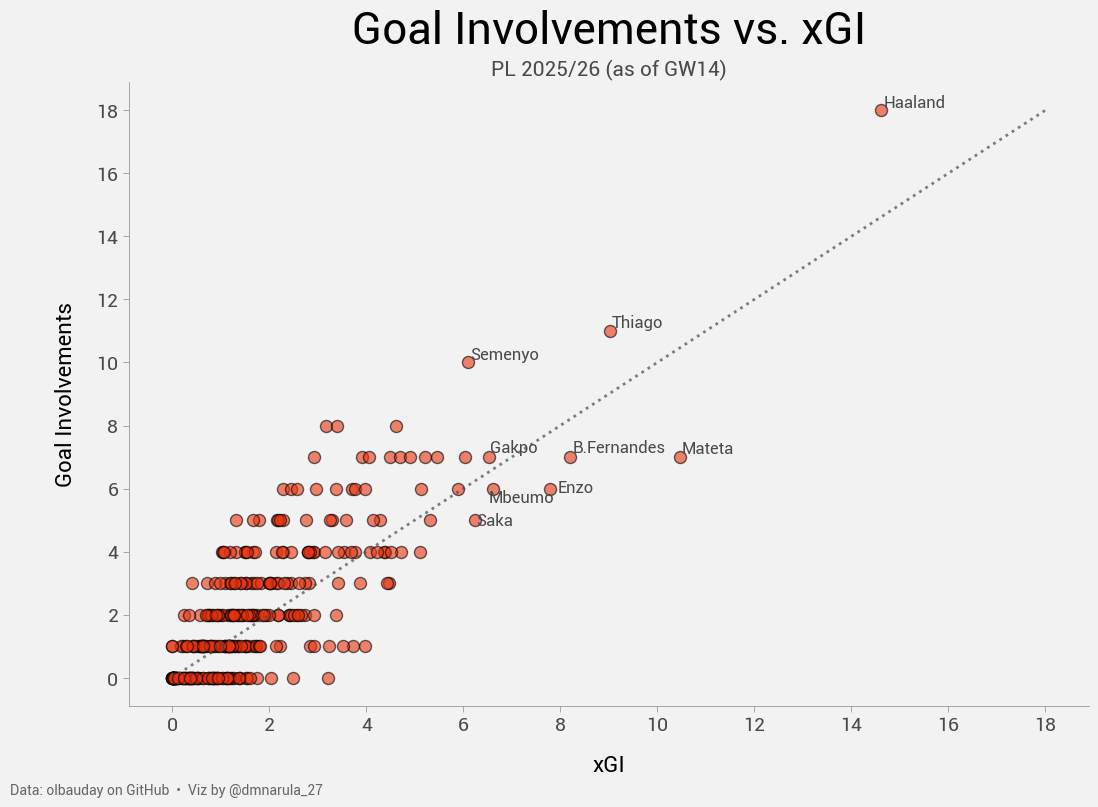

In [10]:
# Making scatter plot

from adjustText import adjust_text

# Size
plt.figure(figsize=(12,8), facecolor="#f2f2f2")

# Scatter plot
plt.scatter(
    df_clean["xGI"],
    df_clean["GI"],
    alpha=0.6,
    s=75,
    edgecolor="black",
    c="#e83410"
)

# Diagonal line
max_val = max(df_clean["xGI"].max(), df_clean["GI"].max())
plt.plot([0, max_val], [0, max_val],
         color="#4a4a4a",
         linestyle=":",
         linewidth=2,
         alpha=0.7,
         solid_capstyle="round"
         )

# Labels
plt.xlabel("xGI", fontsize=16,labelpad=14)
plt.ylabel("Goal Involvements", fontsize=16, labelpad=14)
plt.title("Goal Involvements vs. xGI", fontsize=32, pad=28)
plt.suptitle("PL 2025/26 (as of GW14)",
             fontsize=15,
             y=0.91,
             c="#4a4a4a"
             )

# Axes
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#999999")
ax.spines["left"].set_color("#999999")
ax.spines["left"].set_linewidth(0.6)
ax.spines["bottom"].set_linewidth(0.6)
ax.set_facecolor("#f2f2f2")
ax.tick_params(
    axis='both',
    length=4,
    width=0.6,
    color="#999999",
    labelsize=14
)

# Axis increment
plt.xticks(range(0, int(max_val)+1, 2), fontsize=14, c="#4a4a4a")
plt.yticks(range(0, int(max_val)+1, 2), fontsize=14, c="#4a4a4a")

# Spacing
plt.subplots_adjust(
    left=0.1,
    right=0.9,
    bottom=0.1
)

# Dot labels
texts = []

for _, row in top_xg.iterrows():
    texts.append(
        plt.text(
            row["xGI"],
            row["GI"],
            row["web_name"],
            fontsize=12,
            color="#4a4a4a"
        )
    )

adjust_text(
    texts,
    ax=ax
)

plt.figtext(
    0.001, -0.01,
    "Data: olbauday on GitHub  •  Viz by @dmnarula_27",
    ha="left",
    fontsize=10,
    color="#666666"
)


plt.show()


In [44]:
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import os

# Function to build reusable merge pipeline
def build_match_df(url_stats, url_players, url_teams, url_matches):
    # Load raw data
    df_stats   = pd.read_csv(url_stats)
    df_players = pd.read_csv(url_players)
    df_teams   = pd.read_csv(url_teams)
    df_matches = pd.read_csv(url_matches)

    # Keep certain columns
    player_cols = ["player_code", "player_id", "web_name", "team_code", "position"]
    team_cols   = ["code", "name", "short_name"]
    match_cols  = ["gameweek", "home_team", "away_team",
                   "match_id", "home_score", "away_score"]

    df_players = df_players[player_cols].copy()
    df_teams   = df_teams[team_cols].copy()
    df_matches = df_matches[match_cols].copy()

    # Fix type mismatch: home_team / away_team are floats, teams.code is int
    df_matches["home_team"] = df_matches["home_team"].astype(int)
    df_matches["away_team"] = df_matches["away_team"].astype(int)
    df_teams["code"]        = df_teams["code"].astype(int)

    # Merge stats + players
    df_sp = df_stats.merge(
        df_players,
        on="player_id",
        how="left"
    )

    # Merge in match info
    df_spm = df_sp.merge(
        df_matches,
        on="match_id",
        how="left"
    )

    # Home team
    df_spmh = df_spm.merge(
        df_teams,
        left_on="home_team",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "home_team_name",
        "short_name": "home_team_short_name"
    }).drop(columns=["code"])

    # Away team
    df_spmha = df_spmh.merge(
        df_teams,
        left_on="away_team",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "away_team_name",
        "short_name": "away_team_short_name"
    }).drop(columns=["code"])

    # Player team
    df_final = df_spmha.merge(
        df_teams,
        left_on="team_code",
        right_on="code",
        how="left"
    ).rename(columns={
        "name": "team_name",
        "short_name": "team_short_name"
    }).drop(columns=["code"])

    return df_final

In [45]:
# Load gameweek data into stats and players (currently GW15)
url_stats = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Gameweek/GW15/playermatchstats.csv"
url_players = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Gameweek/GW15/players.csv"
url_teams = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Gameweek/GW15/teams.csv"
url_matches = "https://raw.githubusercontent.com/olbauday/FPL-Elo-Insights/refs/heads/main/data/2025-2026/By%20Gameweek/GW15/matches.csv"

df_final = build_match_df(url_stats, url_players, url_teams, url_matches)
df_matches = pd.read_csv(url_matches)
df_final.head()

,player_id,match_id,minutes_played,goals,assists,total_shots,xg,xa,shots_on_target,successful_dribbles,...,home_team,away_team,home_score,away_score,home_team_name,home_team_short_name,away_team_name,away_team_short_name,team_name,team_short_name
0,58,25-26-prem-aston-villa-vs-arsenal,90,0,1,1,0.09,0.04,0,1,...,7,3,2.0,1.0,Aston Villa,AVL,Arsenal,ARS,Aston Villa,AVL
1,32,25-26-prem-aston-villa-vs-arsenal,90,0,0,0,0.00,0.00,0,0,...,7,3,2.0,1.0,Aston Villa,AVL,Arsenal,ARS,Aston Villa,AVL
2,36,25-26-prem-aston-villa-vs-arsenal,87,1,0,2,0.23,0.02,1,0,...,7,3,2.0,1.0,Aston Villa,AVL,Arsenal,ARS,Aston Villa,AVL
3,21,25-26-prem-aston-villa-vs-arsenal,90,0,0,2,0.15,0.13,1,0,...,7,3,2.0,1.0,Aston Villa,AVL,Arsenal,ARS,Arsenal,ARS
4,16,25-26-prem-aston-villa-vs-arsenal,79,0,0,4,0.57,0.31,2,1,...,7,3,2.0,1.0,Aston Villa,AVL,Arsenal,ARS,Arsenal,ARS


In [46]:
# Final cleaning
stats_cols = ["minutes_played", "goals", "assists",
              "total_shots", "xg", "xa", "shots_on_target"]
player_cols = ["player_code", "player_id", "web_name", "team_code", "position"]
match_cols  = ["gameweek", "home_team", "away_team",
                "match_id", "home_score", "away_score",
               "home_team_name", "home_team_short_name",
               "away_team_name", "away_team_short_name"]
team_cols   = ["team_name", "team_short_name"]

df_final_clean = df_final[stats_cols + player_cols + team_cols + match_cols]
df_final_clean.head()

,minutes_played,goals,assists,total_shots,xg,xa,shots_on_target,player_code,player_id,web_name,...,gameweek,home_team,away_team,match_id,home_score,away_score,home_team_name,home_team_short_name,away_team_name,away_team_short_name
0,90,0,1,1,0.09,0.04,0,226944,58,Kamara,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2.0,1.0,Aston Villa,AVL,Arsenal,ARS
1,90,0,0,0,0.00,0.00,0,98980,32,Martinez,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2.0,1.0,Aston Villa,AVL,Arsenal,ARS
2,87,1,0,2,0.23,0.02,1,199796,36,Cash,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2.0,1.0,Aston Villa,AVL,Arsenal,ARS
3,90,0,0,2,0.15,0.13,1,204480,21,Rice,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2.0,1.0,Aston Villa,AVL,Arsenal,ARS
4,79,0,0,4,0.57,0.31,2,223340,16,Saka,...,15.0,7,3,25-26-prem-aston-villa-vs-arsenal,2.0,1.0,Aston Villa,AVL,Arsenal,ARS


In [47]:
# Team colors
team_colors = {
    "ARS": "#EF0107",   # Arsenal
    "AVL": "#670E36",   # Aston Villa
    "BOU": "#DA291C",   # Bournemouth
    "BRE": "#EF2B2D",   # Brentford
    "BHA": "#0057B8",   # Brighton
    "CHE": "#034694",   # Chelsea
    "CRY": "#1B458F",   # Crystal Palace
    "EVE": "#003399",   # Everton
    "FUL": "#000000",   # Fulham
    "LEE": "#FFCD00",   # Leeds United (yellow)
    "LIV": "#C8102E",   # Liverpool
    "MCI": "#6CABDD",   # Man City
    "MUN": "#DA291C",   # Man Utd
    "NEW": "#241F20",   # Newcastle
    "NFO": "#DD0000",   # Nottingham Forest
    "SUN": "#E03A3E",   # Sunderland (red)
    "TOT": "#132257",   # Tottenham
    "WHU": "#7A263A",   # West Ham
    "WOL": "#FDB913",   # Wolves
    "BUR": "#6C1D45"    # Burnley (claret)
}

In [127]:
# Match Analysis Player xG vs. xA

# Automating chart combinations

os.makedirs("match_figs", exist_ok=True)

def plot_match_xg_xa(match_id):
  match_df = df_final_clean[
      (df_final_clean["match_id"] == match_id) &
      (df_final_clean["minutes_played"] > 0) &
      (df_final_clean["position"] != "Goalkeeper")
  ]
  if match_df.empty:
    return

  # Building scatterplot

  plt.figure(figsize=(12,8), facecolor="#f2f2f2")

  # Dot colors
  custom_colors = {
      team: team_colors.get(team, "#4a4a4a")
      for team in match_df["team_short_name"].unique()
  }

  sns.scatterplot(
      data=match_df,
      x="xg",
      y="xa",
      s=75,
      alpha=1,
      hue="team_short_name",
      palette=custom_colors,
      edgecolor="black"
  )

  # Labels and legend
  gw = match_df['gameweek'].iloc[0].astype(int)
  match_title = f"{match_df['home_team_name'].iloc[0]} vs. {match_df['away_team_name'].iloc[0]} (GW{gw})"
  plt.xlabel("xG", fontsize=18)
  plt.ylabel("xA", fontsize=18)
  plt.title("Expected Attacking Output", fontsize=30, pad=34)
  plt.suptitle(match_title,
              fontsize=15,
              x=0.51,
              y=0.918,
              c="#4a4a4a")
  leg = plt.legend(title=None,
                  frameon=True,
                  bbox_to_anchor=(1, 1.1))
  leg.get_frame().set_edgecolor("none")
  leg.get_frame().set_facecolor('#f2f2f2')

  # Axis formatting
  ax = plt.gca()
  ax.spines["bottom"].set_color("#999999")
  ax.spines["left"].set_color("#999999")
  ax.spines["left"].set_linewidth(0.6)
  ax.spines["bottom"].set_linewidth(0.6)
  ax.set_facecolor("#f2f2f2")
  plt.tick_params(
      axis='both',
      which='both',
      length=4,
      width=0.6,
      color="#888888",
      labelsize=12
  )

  xmin, xmax = plt.xlim()
  ymin, ymax = plt.ylim()

  # Set tick increments to 0.2
  plt.xticks(np.arange(round(xmin, 1), round(xmax + 0.22, 1), 0.2))
  plt.yticks(np.arange(round(ymin+0.02, 1), round(ymax + 0.22, 1), 0.1))

  # Dot labels
  texts=[]
  # At least 0.1 xG or 0.1 xA
  label_df = match_df[(match_df["xg"] > 0.1) | (match_df["xa"] > 0.1)]
  for _, row in label_df.iterrows():
      texts.append(
          plt.text(
              row["xg"] + 0.01,
              row["xa"] - 0.002,
              row["web_name"],
              fontsize=12,
              alpha=0.9
          )
      )

  # Misc text
  plt.figtext(
      0.05, 0.01,
      "Data: olbauday on GitHub  •  Viz by @dmnarula_27",
      ha="left",
      fontsize=10,
      color="#666666"
  )

  plt.grid(alpha=0.2)
  # Remove top and right border
  sns.despine()

  # Lines
  split = 0.4
  plt.axvline(x=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)
  plt.axhline(y=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)

  # Quadrant shading & text
  from matplotlib.patches import Rectangle

  x_min, x_max = ax.get_xlim()
  y_min, y_max = ax.get_ylim()

  # Top right - elite
  if x_max > split and y_max > split:
    ax.add_patch(Rectangle(
        (split, split),
        x_max - split,
        y_max - split,
        facecolor="#e0a81b",
        alpha=0.1,
        edgecolor="none"
    ))

    elite_x = (split + x_max) / 2
    elite_y = (split + y_max) / 2
    ax.text(
        elite_x, elite_y,
        "Elite",
        ha="center", va="center",
        fontsize=14,
        color="#e0a81b",
        alpha=0.9
    )

  # Top left - creative
  if x_min < split and y_max > split:
    ax.add_patch(Rectangle(
        (x_min, split),
        split - x_min,
        y_max - split,
        facecolor="#999999",
        alpha=0.1,
        edgecolor="none"
    ))

    creative_x = (x_min + split) / 2
    creative_y = (split + y_max) / 2
    ax.text(
        creative_x, creative_y,
        "Creative",
        ha="center", va="center",
        fontsize=14,
        color="#999999",
        alpha=1
    )

  # Bottom right - threat
  if x_max > split and y_min < split:
    ax.add_patch(Rectangle(
        (split, y_min),
        x_max - split,
        split - y_min,
        facecolor="#999999",
        alpha=0.1,
        edgecolor="none"
    ))

    threat_x = (split + x_max) / 2
    threat_y = (y_min + split) / 2
    ax.text(
        threat_x, threat_y,
        "Threat",
        ha="center", va="center",
        fontsize=14,
        color="#999999",
        alpha=1
    )

  # adjust_text(
  #     texts,
  #     arrowprops=dict(arrowstyle="-", color="gray", lw=0.4),
  #     only_move={'points':'x', 'texts':'x'}
  # )

  save_title = f"{match_df['home_team_short_name'].iloc[0]}-vs-{match_df['away_team_short_name'].iloc[0]}_xg_xa_gw{gw}.png"

  plt.savefig(
      os.path.join("match_figs", save_title),
      dpi=300,
      bbox_inches="tight",
      facecolor=plt.gcf().get_facecolor()
    )

  plt.close()






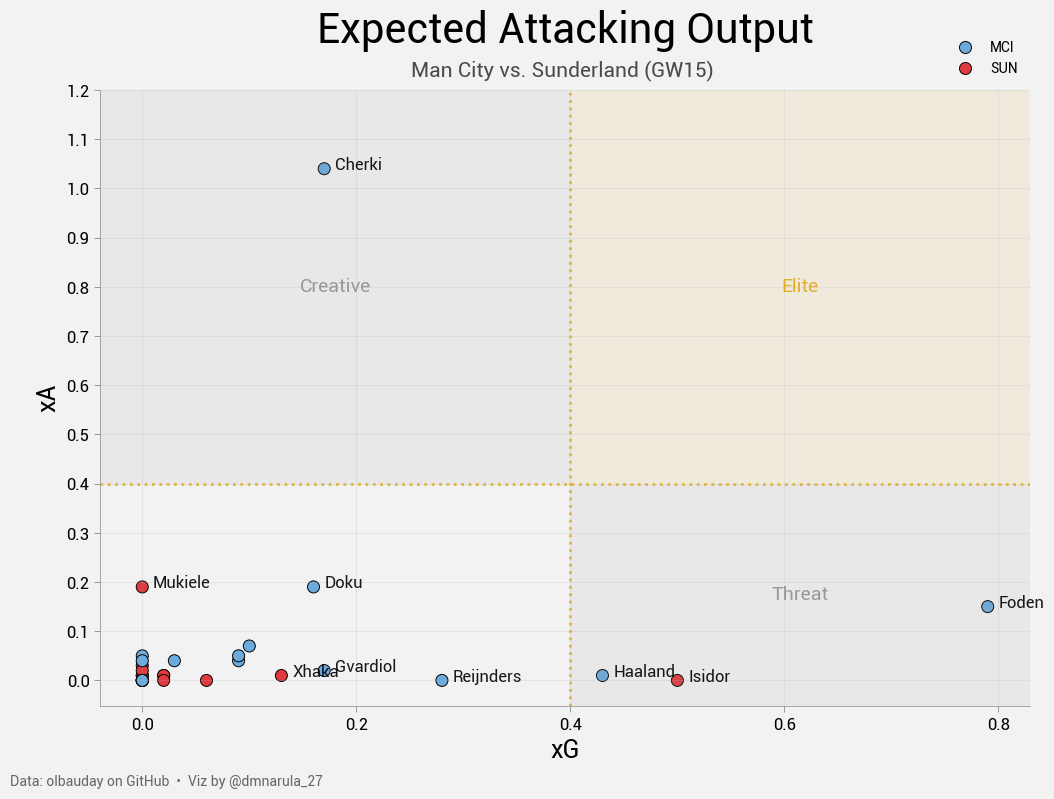

In [118]:
# plot_match_xg_xa("25-26-prem-manchester-city-vs-sunderland")

In [128]:
# Looping through all match IDs and saving to "figs" folder
match_ids = df_final_clean["match_id"].unique()

for mid in match_ids:
  plot_match_xg_xa(mid)


In [129]:
# Zip and download
import shutil
from google.colab import files

zip_name = f"match_xg_xa_gw{gw}"

shutil.make_archive(zip_name, "zip", "match_figs")
files.download(f"{zip_name}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>